In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style = 'darkgrid')

In [155]:
house = pd.read_csv('kc_house_data.csv')

In [156]:
house = house.drop(['id', 'date', 'sqft_basement', 'zipcode'], axis = 1)

In [157]:
house = house[house['bedrooms'] != 33]

In [158]:
import math

In [159]:
Y = house['price']
# Drop price from the house dataframe and create a matrix out of the house data
house = house.drop(['price'], axis=1)
X = house.values
# Store the column/feature names into a list "colnames"
colnames = house.columns

In [132]:
colnames = house.columns

In [160]:
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, ElasticNet)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [161]:
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [162]:
ridge = Ridge(alpha = 1.0)
ridge.fit(X,Y)
ranks['Ridge'] = ranking(np.abs(ridge.coef_), colnames)

In [163]:
lasso = Lasso(alpha = 1.0)
lasso.fit(X, Y)
ranks["Lasso"] = ranking(np.abs(lasso.coef_), colnames)

In [164]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
rf.fit(X,Y)
ranks["RF"] = ranking(rf.feature_importances_, colnames)

building tree 1 of 50building tree 2 of 50building tree 3 of 50


building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50building tree 26 of 50

building tree 27 of 50
building tree 28 of 50


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.0s


building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.4s finished


In [165]:
elastic = ElasticNet(alpha = 1.0)
elastic.fit(X,Y)
ranks["elastic"] = ranking(np.abs(elastic.coef_), colnames)

In [139]:
ranks = pd.DataFrame(ranks)

In [166]:
r = {}
for name in colnames:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)

In [167]:
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print("\t%s" % "\t".join(methods))
for name in colnames:
    print("%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods]))))

	Lasso	RF	Ridge	elastic	Mean
bedrooms	0.06	0.0	0.06	0.45	0.14
bathrooms	0.07	0.02	0.07	0.26	0.11
sqft_living	0.0	0.95	0.0	0.0	0.24
sqft_lot	0.0	0.04	0.0	0.0	0.01
floors	0.0	0.0	0.0	0.22	0.06
waterfront	1.0	0.09	1.0	0.15	0.56
view	0.08	0.03	0.08	0.65	0.21
condition	0.05	0.0	0.05	0.14	0.06
grade	0.16	1.0	0.17	1.0	0.58
sqft_above	0.0	0.06	0.0	0.0	0.02
yr_built	0.0	0.08	0.0	0.05	0.03
yr_renovated	0.0	0.0	0.0	0.0	0.0
lat	0.95	0.55	0.96	0.34	0.7
long	0.2	0.24	0.2	0.11	0.19
sqft_living15	0.0	0.11	0.0	0.0	0.03
sqft_lot15	0.0	0.04	0.0	0.0	0.01


In [168]:
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)

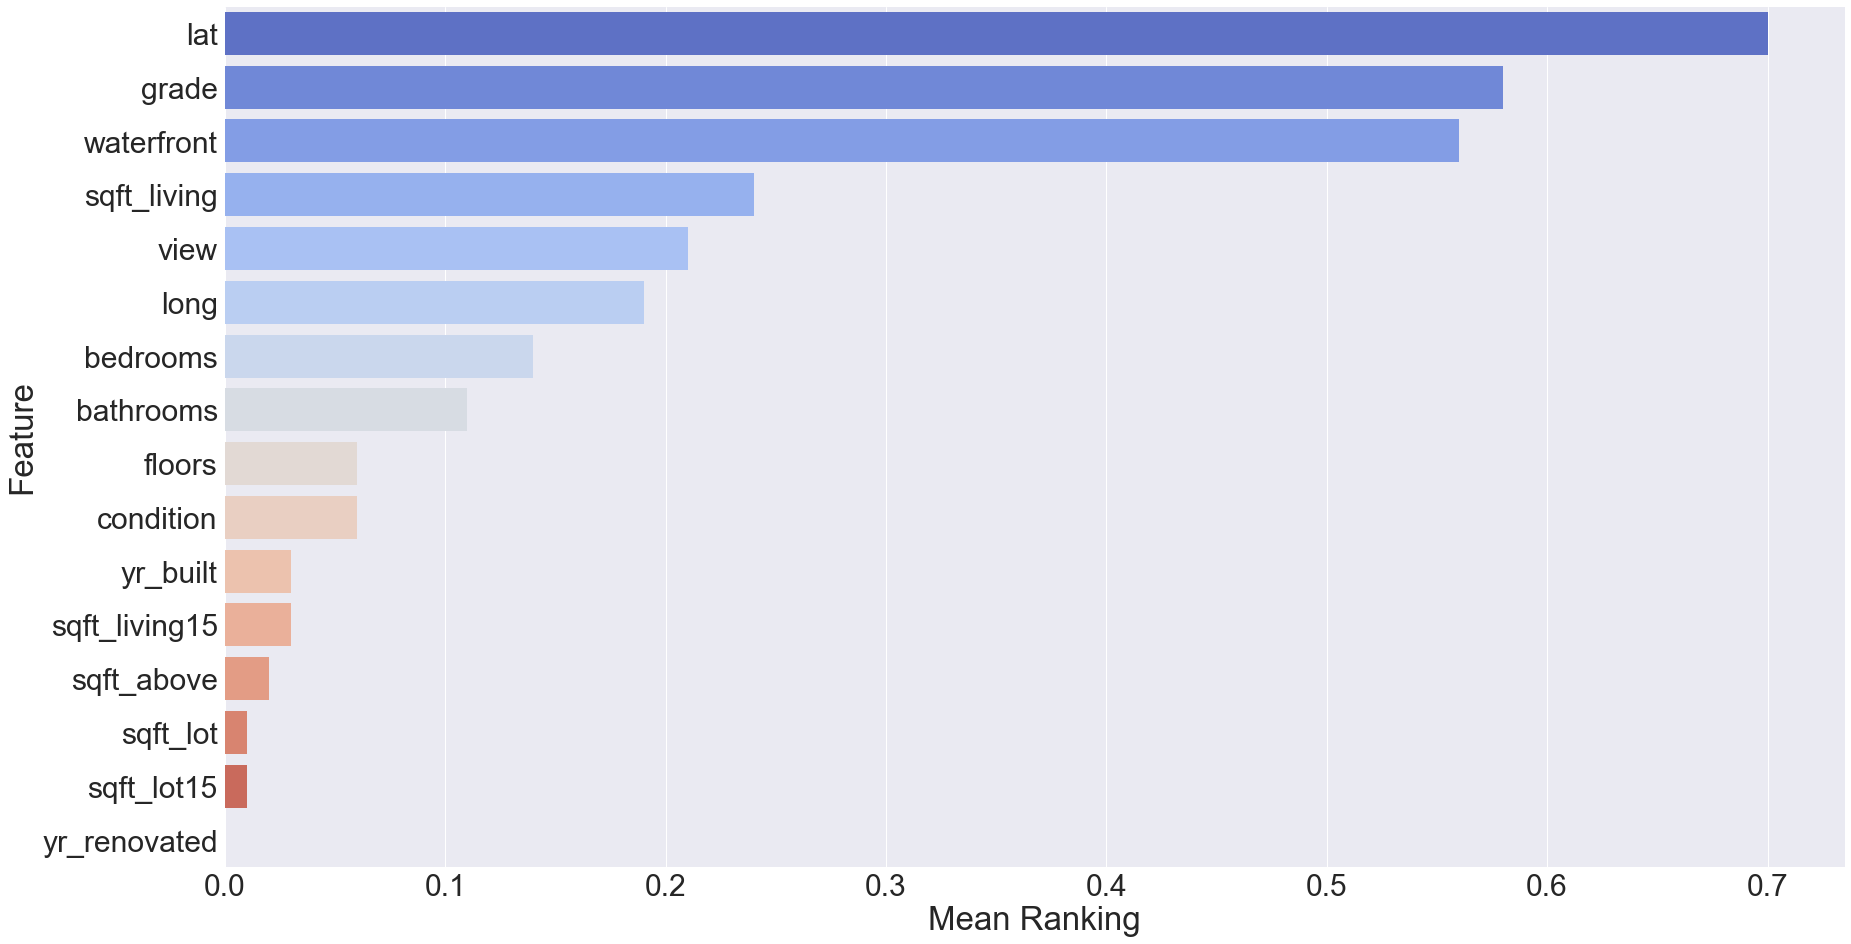

In [169]:
sns.set(font_scale=3)
sns.factorplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar", 
               size=14, aspect=1.9, palette='coolwarm')